In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Question 1

### Constructing data frame

In [77]:
df = pd.DataFrame({
    "ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [28, 35, 42, 30, 50, 41, 29, 33, 45, 39],
    "Gender": ["Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female"],
    "Department": ["IT", "HR", "Finance", "Marketing", "Sales", "HR", "IT", "Finance", "Sales", "Marketing"],
    "Salary ($)": [70000, 60000, 90000, 65000, 85000, 62000, 75000, 88000, 87000, 67000],
    "Experience (Years)": [3, 7, 12, 5, 15, 9, 4, 11, 14, 6],
    "Work Hours/Week": [40, 38, 45, 42, 50, 37, 39, 44, 48, 41],
    "Projects Completed": [5, 4, 6, 7, 8, 5, 6, 7, 9, 6],
    "Job Satisfaction (1-10)": [7, 8, 6, 9, 5, 7, 8, 6, 5, 8],
    "Training Hours": [20, 15, 18, 25, 12, 16, 22, 20, 14, 19],
    "Promotion Status": ["No", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "Yes", "No"],
})

df

,ID,Age,Gender,Department,Salary ($),Experience (Years),Work Hours/Week,Projects Completed,Job Satisfaction (1-10),Training Hours,Promotion Status
0,1,28,Male,IT,70000,3,40,5,7,20,No
1,2,35,Female,HR,60000,7,38,4,8,15,Yes
2,3,42,Male,Finance,90000,12,45,6,6,18,Yes
3,4,30,Female,Marketing,65000,5,42,7,9,25,No
4,5,50,Male,Sales,85000,15,50,8,5,12,Yes
5,6,41,Female,HR,62000,9,37,5,7,16,No
6,7,29,Male,IT,75000,4,39,6,8,22,No
7,8,33,Female,Finance,88000,11,44,7,6,20,Yes
8,9,45,Male,Sales,87000,14,48,9,5,14,Yes
9,10,39,Female,Marketing,67000,6,41,6,8,19,No


### Exploratory Data Analysis

#### Overview of the dataset

In [61]:
# (rows, columns)
df.shape

(10, 11)

In [62]:
# summary statistics
df.describe()

,ID,Age,Salary ($),Experience (Years),Work Hours/Week,Projects Completed,Job Satisfaction (1-10),Training Hours
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,5.50000,37.200000,74900.000000,8.600000,42.400000,6.300000,6.90000,18.100000
std,3.02765,7.390685,11647.126493,4.247875,4.299871,1.494434,1.37032,3.928528
min,1.00000,28.000000,60000.000000,3.000000,37.000000,4.000000,5.00000,12.000000
25%,3.25000,30.750000,65500.000000,5.250000,39.250000,5.250000,6.00000,15.250000
50%,5.50000,37.000000,72500.000000,8.000000,41.500000,6.000000,7.00000,18.500000
75%,7.75000,41.750000,86500.000000,11.750000,44.750000,7.000000,8.00000,20.000000
max,10.00000,50.000000,90000.000000,15.000000,50.000000,9.000000,9.00000,25.000000


In [63]:
unique_depart = df['Department'].unique()
unique_promo_status = df['Promotion Status'].unique()

# unique values from Department and count
print(unique_depart, len(unique_depart))
# unqiue values from Promotion Status and count
print(unique_promo_status, len(unique_promo_status))

['IT' 'HR' 'Finance' 'Marketing' 'Sales'] 5
['No' 'Yes'] 2


#### Handling missing values

In [64]:
df.isna().sum()

ID                         0
Age                        0
Gender                     0
Department                 0
Salary ($)                 0
Experience (Years)         0
Work Hours/Week            0
Projects Completed         0
Job Satisfaction (1-10)    0
Training Hours             0
Promotion Status           0
dtype: int64

dataframe does not have any missing values

#### Visual Analysis and Interpretation

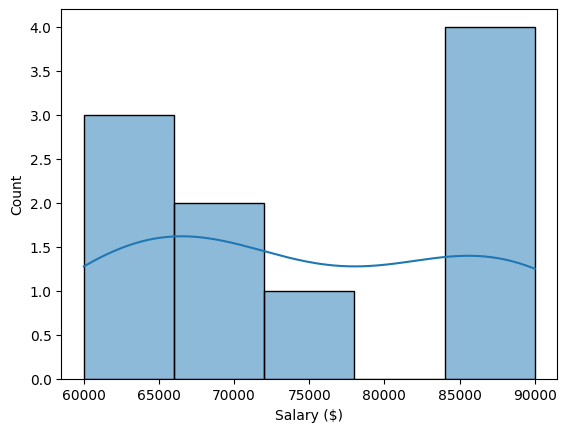

In [78]:
sns.histplot(data=df, x='Salary ($)', alpha=0.5, kde=True)
plt.show()

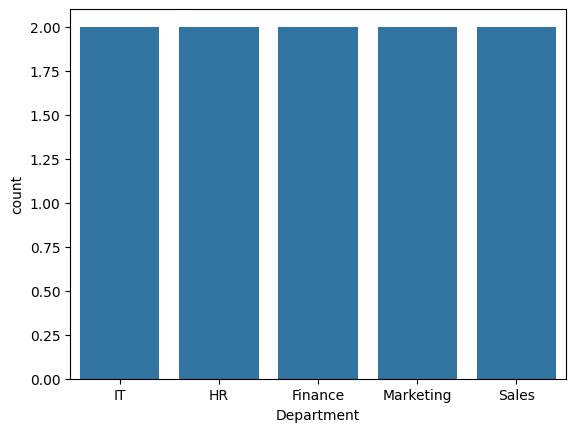

In [84]:
sns.countplot(data=df, x='Department')
plt.show()

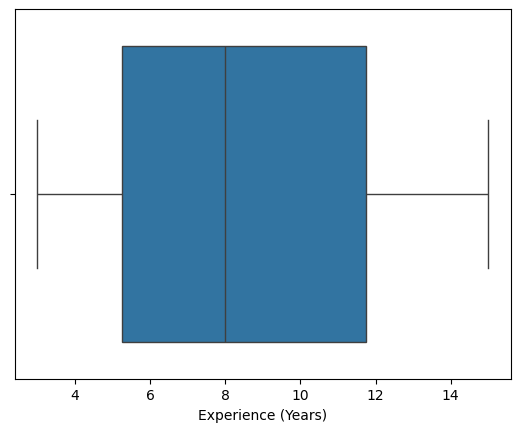

In [87]:
sns.boxplot(data=df, x='Experience (Years)')
plt.show()

## Question 2

In [66]:
df = pd.read_csv('heart_disease.csv')

df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


### Basic Insights

In [67]:
# (rows, cols)
df.shape

(10000, 21)

In [68]:
# summary statistics of numerical columns
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [69]:
# count of unique values in gender and smoking
print(f'gender: {len(df['Gender'].unique())}')
print(f'smoking: {len(df['Smoking'].unique())}')

gender: 3
smoking: 3


### Handling missing data

In [70]:
# checking if missing values exist in dataset
df.isna().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [71]:
# for quantitative and continous data, it is best to use mean or median to handle null values
# for other types, it is best to use mode

# handling null values
for column in df.select_dtypes(include='number'):
  mean = df[column].mean()
  df.loc[df[column].isna(), column] = mean if df[column].std() / mean >= 1 else df[column].median()

for column in df.select_dtypes(exclude='number'):
  df.loc[df[column].isna(), column] = df[column].mode()[0]

# no more null values
df.isna().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

### Data Visualization

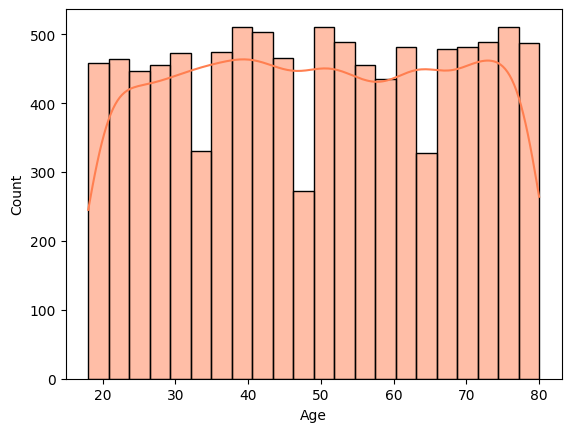

In [72]:
sns.histplot(data=df, x='Age', kde=True, alpha=0.5, color='coral')
plt.show()

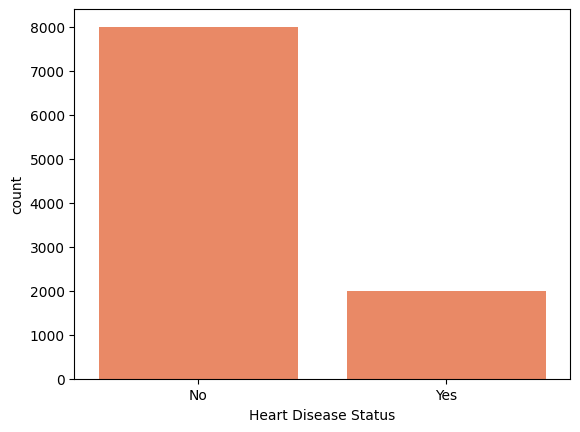

In [73]:
sns.countplot(data=df, x='Heart Disease Status', color='coral')
plt.show()

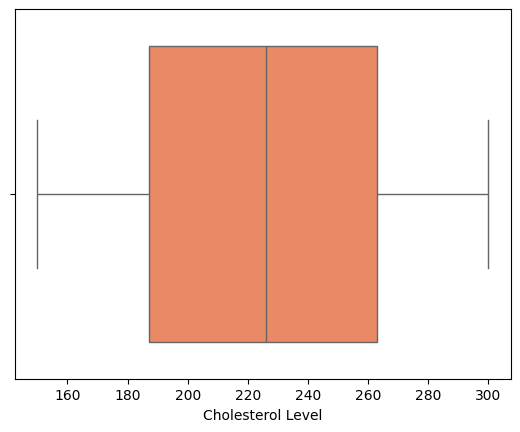

In [74]:
sns.boxplot(data=df, x='Cholesterol Level', color='coral')
plt.show()